<a href="https://colab.research.google.com/github/Eylz-Liu/Mod-le-vol-locale/blob/main/Etude_GSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1 - Tirage Taux court


# 1.1 Extraction de GSE Taux *court* Yearly


In [2]:
# Étape 1 : Uploader le fichier Excel depuis ton ordinateur
from google.colab import files
uploaded = files.upload()  # Choisis le fichier SXE5 OVDV 1211.xlsx

# Étape 2 : Lire le fichier Excel avec pandas
import pandas as pd
import numpy as np

# Remplace par le nom exact du fichier uploadé
filename = "TIRAGES_TXCOURT_Y.xlsx"

# Lire la 2e feuille (index 1) sans en-tête
df = pd.read_excel(filename, sheet_name=0, header=None)

# Étape 3 : Extraire les strikes (première ligne, hors première colonne)

maturities = df.iloc[0, 1:].astype(float).values # .str.replace('%', '').astype(float).values

# Étape 4 : Extraire les maturités (première colonne, hors première ligne)
scenario = df.iloc[1:, 0].astype(float).values
print("T_array (maturities):", maturities.shape)

# Étape 5 : Extraire la matrice IV (le reste du tableau)
TL_matrix = df.iloc[1:, 1:].astype(float).values

# Étape 6 : Afficher les résultats
print("scenario:", scenario)
print("Maturities (years):", maturities)
print("TL Matrix shape:", TL_matrix.shape)
print("TL Matrix (extrait):\n", TL_matrix[:5, :7])  # Affiche un extrait

Saving TIRAGES_TXCOURT_Y.xlsx to TIRAGES_TXCOURT_Y (1).xlsx
T_array (maturities): (42,)
scenario: [   1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.
   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.   24.
   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.
   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.   48.
   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.   60.
   61.   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.   72.
   73.   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.   84.
   85.   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.   96.
   97.   98.   99.  100.  101.  102.  103.  104.  105.  106.  107.  108.
  109.  110.  111.  112.  113.  114.  115.  116.  117.  118.  119.  120.
  121.  122.  123.  124.  125.  126.  127.  128.  129.  130.  131.  132.
  133.  134.  135.  136.  137.  138.  139.  140.  141.  142.  143.  144.
  145.  146.  147.  148.  

# 1.2 Statistiques descriptives par année ( par colonnes) sur les 1000 scnéarios

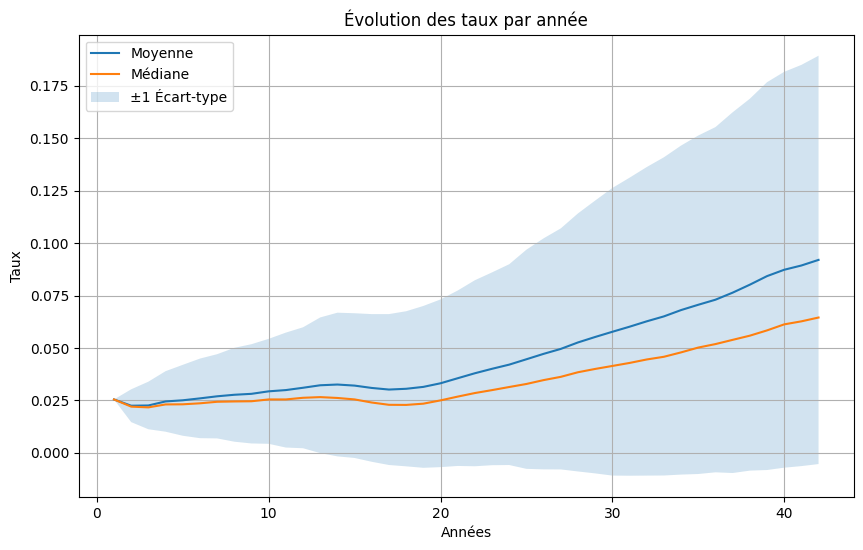

In [5]:
#*******************************************************************
# 1.2.1 - Moyenne, médiane, écart-type par année
#*******************************************************************
mean_by_year = np.mean(TL_matrix, axis=0)
median_by_year = np.median(TL_matrix, axis=0)
std_by_year = np.std(TL_matrix, axis=0)

# 1.2.2 Visualisation des tendance
# for i, year in enumerate(maturities):
#    print(f"Année {year:.0f} : Moyenne={mean_by_year[i]:.4f}, Médiane={median_by_year[i]:.4f}, Écart-type={std_by_year[i]:.4f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(maturities, mean_by_year, label='Moyenne')
plt.plot(maturities, median_by_year, label='Médiane')
plt.fill_between(maturities, mean_by_year - std_by_year, mean_by_year + std_by_year, alpha=0.2, label='±1 Écart-type')
plt.title("Évolution des taux par année")
plt.xlabel("Années")
plt.ylabel("Taux")
plt.legend()
plt.grid(True)
plt.show()

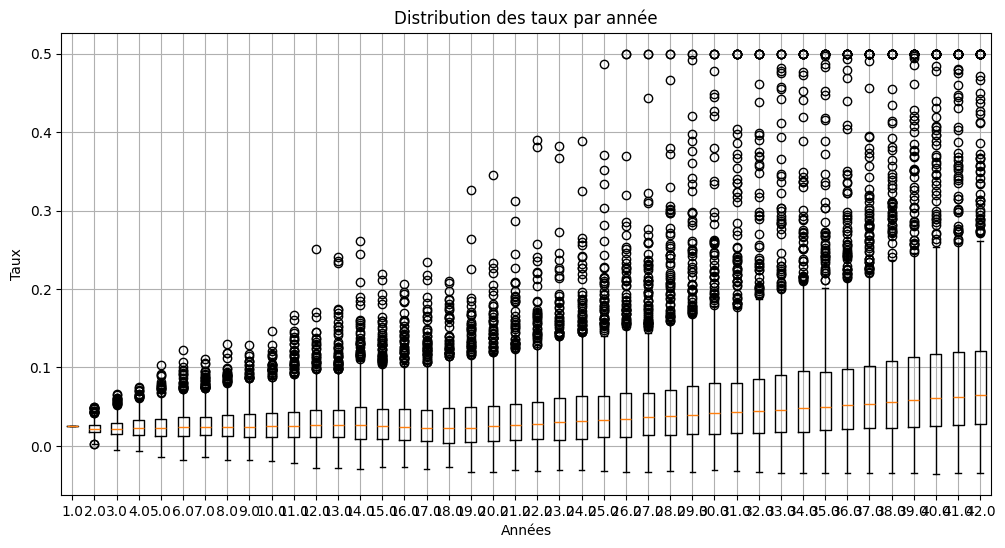

In [7]:
#  1.2.3. Boxplots pour visualiser la dispersion
plt.figure(figsize=(12, 6))
plt.boxplot(TL_matrix, positions=maturities, widths=0.5)
plt.title("Distribution des taux par année")
plt.xlabel("Années")
plt.ylabel("Taux")
plt.grid(True)
plt.show()

# 1.3 Analyse par scénario / par ligne

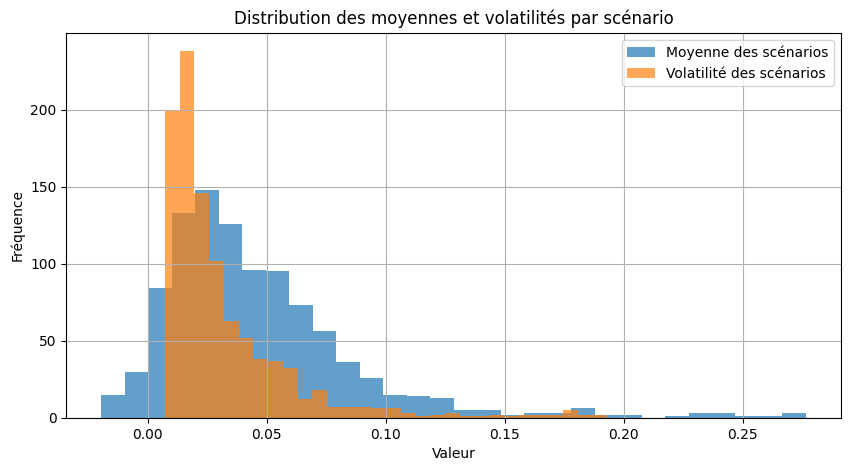

In [8]:
mean_by_scenario = np.mean(TL_matrix, axis=1)
std_by_scenario = np.std(TL_matrix, axis=1)

plt.figure(figsize=(10, 5))
plt.hist(mean_by_scenario, bins=30, alpha=0.7, label='Moyenne des scénarios')
plt.hist(std_by_scenario, bins=30, alpha=0.7, label='Volatilité des scénarios')
plt.title("Distribution des moyennes et volatilités par scénario")
plt.xlabel("Valeur")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)
plt.show()

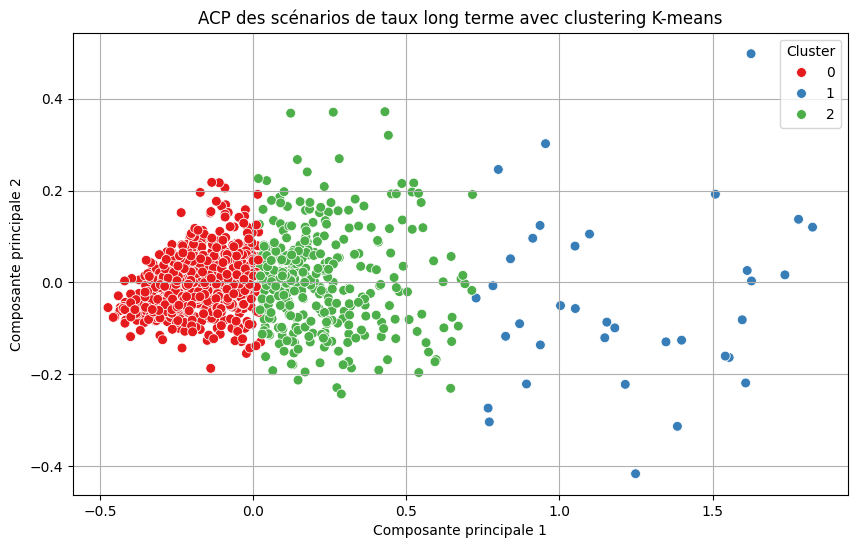

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Étape 1 : ACP (réduction à 2 dimensions)
pca = PCA(n_components=2)
TL_pca = pca.fit_transform(TL_matrix)

# Étape 2 : Clustering K-means (3 groupes)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(TL_matrix)

# Étape 3 : Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=TL_pca[:, 0], y=TL_pca[:, 1], hue=clusters, palette='Set1', s=50)
plt.title("ACP des scénarios de taux court terme avec clustering K-means")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()